# Trabajo de perfiles de Aerodinámica NSA

In [32]:
import numpy as np
import os
from numpy import cos, sin, arccos, pi,tan
import scipy.integrate as integrate
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


carpeta_datos_csv = r"datos_csv/"
if not os.path.exists(carpeta_datos_csv):
    os.mkdir(carpeta)

In [ ]:
def guardarcsv(archivo, nombre_archivo):
    # guarda el archivo .csv en la carpeta especificada
    carpeta_datos_csv = r"datos_csv/"
    archivo.to_csv(carpeta_datos_csv+nombre_archivo+".csv")

def leyendagrafica():
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=5)

def perfilnaca(DNI):
    # genera los parámetros del perfil
    """
    123VWXYZ
    01234567
    """
    f = 1 + int(int(DNI[3])*5/8)
    xf = 20 + 10*int(int(DNI[4])/8*2)
    t = 8 +int(int(DNI[5])*10/9)
    ca = 20 +5*int(int(DNI[6])*3/8)
    delta_a = 5 + 5*int(int(DNI[7])*2/8)
    parametros = np.array([f,xf,t,ca,delta_a])/100
    print("Tu perfil NACA es el",str(f),str(xf)[0],str(t))
    return parametros

## Datos iniciales (datos del perfil NACA)

In [2]:
parametros_perfil = perfilnaca("")
f = parametros_perfil[0]
xf = parametros_perfil[1]
t = parametros_perfil[2]
ca = parametros_perfil[3]
delta_a = np.radians(-parametros_perfil[4]*100)

numero_coeficientes = 250 # número de coeficientes 
xa = 1 -ca
n = np.linspace(0,numero_coeficientes,numero_coeficientes+1)

# Funciones de los coeficientes A0,A1,...,AN

In [3]:
def coefA0(xf=xf,f=f):
    # Coeficiente A0 para el perfil sin timon
    lim_inf = 0
    lim_sup = pi
    lim_medio = medio = arccos([(xf-0.5)*2])[0]
    tramo1 = integrate.quad(lambda x: f/(1-xf)**2*(2*xf-1-cos(x)),lim_inf,lim_medio)
    tramo2 = integrate.quad(lambda x: f/xf**2 *(2*xf-1-cos(x)),lim_medio,lim_sup)
    
    return -1/pi * (tramo1[0] + tramo2[0])

def coefAN(n=n,xf=xf,f=f):
    # Coeficientes AN para el perfil sin timon
    lim_inf = 0
    lim_sup = pi
    lim_medio = medio = arccos([(xf-0.5)*2])[0]
    tramo1 = integrate.quad(lambda x: (f/(1-xf)**2 * (2*xf-1-cos(x)))*cos(n*x),lim_inf,lim_medio)
    tramo2 = integrate.quad(lambda x: (f/xf**2 *(2*xf-1-cos(x)))*cos(n*x),lim_medio,lim_sup)
    
    return -2/pi * (tramo1[0] + tramo2[0])

def coefA0_T(ca=ca,delta_a=delta_a):
    # Coeficiente A0 para el perfil con timon
    lim_inf = 0
    lim_medio2 = arccos([((1-ca)-0.5)*2])[0]
    tramo1 = integrate.quad(lambda x: tan(delta_a),lim_inf,lim_medio2)
    return -1/pi * tramo1[0]

def coefAN_T(ca=ca,delta_a=delta_a,n=n):
    # Coeficiente A0 para el perfil con timon
    lim_inf = 0
    lim_medio2 = arccos([((1-ca)-0.5)*2])[0]
    tramo1 = integrate.quad(lambda x: tan(delta_a)*cos(n*x),lim_inf,lim_medio2)
    return -2/pi * tramo1[0]
    

## 1. Cálculo de los coeficientes de Glauert 
### 1.1 Para el timón sin perfil

In [4]:
import pandas as pd
Coeficientes_n = pd.DataFrame()
CoefAN_ST = np.array([])
count = 0
coef = 0
for count,i in enumerate(n):
    if count == 0:
        coef = coefA0()
        CoefAN_ST = np.append(CoefAN_ST,coef) # ojo, que casi la cagas por esto: no lo quites, porque sino A0 no se pone dentro del vector para el calculo del Cl
    else:
        coef = coefAN(int(count),xf,f)
        CoefAN_ST = np.append(CoefAN_ST,coef)
    coeficientes_n = pd.DataFrame({"Coeficientes Sin Timon":"A"+str(count),"A":coef},index = [count])
    Coeficientes_n= Coeficientes_n.append(coeficientes_n)
guardarcsv(Coeficientes_n,"coeficientes_sin_timon")
# aqui la variables para su uso se recogen en CoefAN(np.array)

In [5]:
Coeficientes_n

,Coeficientes Sin Timon,A
0,A0,-1.760042e-02
1,A1,9.798992e-02
2,A2,-5.092958e-02
3,A3,3.055775e-02
4,A4,-1.181566e-02
...,...,...
246,A246,-1.360910e-06
247,A247,3.748286e-06
248,A248,-3.122766e-06
249,A249,2.902786e-08


### 1.2 Para SOLAMENTE el timon

In [6]:
CoeficientesT = pd.DataFrame()
CoefAN_CT = np.array([])
count = 0
for count,i in enumerate(n):
    if count == 0:
        coef = coefA0_T()
        CoefAN_CT = np.append(CoefAN_CT,coef)
    else:
        coef = coefAN_T(ca,delta_a,int(count))
        CoefAN_CT = np.append(CoefAN_CT,coef)
    coeficientesT = pd.DataFrame({"Coeficientes Solo Timon":"A"+str(count),"A":coef},index = [count])
    CoeficientesT = CoeficientesT.append(coeficientesT)
guardarcsv(CoeficientesT,"coeficientes_solo_timon")
CoeficientesT
# aqui la variables para su uso se recogen en CoefAN_timon (np.array)

,Coeficientes Solo Timon,A
0,A0,0.035259
1,A1,0.053132
2,A2,0.015939
3,A3,-0.011335
4,A4,-0.013070
...,...,...
246,A246,-0.000097
247,A247,-0.000223
248,A248,-0.000037
249,A249,0.000199


## 2. Calculo de los Cl y Cp de los distintos perfiles de vuelo
### 2.1 Cl y Cp para el perfil sin timon

![alt text](fotos/Cl.png "Cl para el perfil")


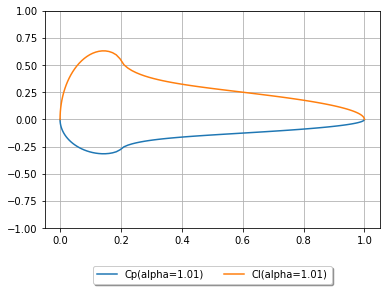

In [7]:
from numpy import tan
import matplotlib.pyplot as plt 
n1 = np.linspace(0,numero_coeficientes,numero_coeficientes)# ojito con este coeficiente, dado que las dimensiones se pueden ir a la mierda en caso de que se toque

def sumAN(theta,CoefAN,n):
    Sumatorio = np.array([])
    
    for count,i in enumerate(theta):
        
        sumatorio = 0
        
        for count2,j in enumerate(n):
            if count2 == 0:
                continue
            else :
                sumatorio += CoefAN[count2]*sin(int(count2)*i)
        Sumatorio = np.append(Sumatorio,sumatorio)
    return Sumatorio

"""
def sumAN(theta,CoefAN,n_cl):
    # this function give us the sumatory in the right side of the formula
    Sumatorio = np.array([])
    for count,i in enumerate(theta):
        sumatorio = 0
        for count2,j in enumerate(n_cl):
            sumatorio = sumatorio +CoefAN[count2]*sin(int(count2+1)*i)
        Sumatorio = np.append(Sumatorio,sumatorio)
    return Sumatorio
"""

theta = np.linspace(0,pi,100) # variable independiente
x = 0.5+0.5*cos(theta) # e
alpha_ST =np.array([-coefA0()])  # alpha, angulo de ataque



plt.figure(1)
for i in alpha_ST:
    cl_ST = 4*((i+coefA0())*tan(theta/2)+sumAN(theta,CoefAN_ST,n1))
    cp_ST = -cl_ST/2
    plt.plot(x,cp_ST,label = "Cp(alpha="+ str(round(np.degrees(i),2))+")")
    plt.plot(x,cl_ST,label = "Cl(alpha="+ str(round(np.degrees(i),2))+")")
cL_ST = pd.DataFrame({"Eje X":x,"Eje Theta":theta,"Cl(alpha="+ str(round(np.degrees(alpha_ST[0]),2))+")":cl_ST,"Cp(alpha="+ str(round(np.degrees(alpha_ST[0]),2))+")":cp_ST})
leyendagrafica()
plt.ylim((-1,1))
plt.grid(True)
guardarcsv(cL_ST,"datoscl_solo_perfil")

#CL_CP_ST.insert(loc=0, column='Eje X', value=x)
#CL_CP_ST.insert(loc=1, column='Theta', value=theta)
#plt.plot(x,cp_ST, label = "Cp")
#CL_CP_ST.to_csv("datos_Cl_ST.csv")


In [8]:
cL_ST 

,Eje X,Eje Theta,Cl(alpha=1.01),Cp(alpha=1.01)
0,1.000000,0.000000,0.000000e+00,-0.000000e+00
1,0.999748,0.031733,6.373328e-03,-3.186664e-03
2,0.998993,0.063467,1.275199e-02,-6.375994e-03
3,0.997736,0.095200,1.912470e-02,-9.562350e-03
4,0.995977,0.126933,2.548173e-02,-1.274087e-02
...,...,...,...,...
95,0.004023,3.014660,1.456786e-01,-7.283929e-02
96,0.002264,3.046393,1.095850e-01,-5.479250e-02
97,0.001007,3.078126,7.322898e-02,-3.661449e-02
98,0.000252,3.109859,3.667971e-02,-1.833986e-02


### 2.1 Cl y Cp para SOLAMENTE el timon

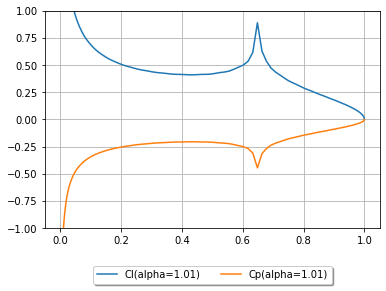

In [9]:
alpha_T = np.array([-coefA0()])
plt.figure(1)
CL_CP_T = pd.DataFrame()
for count,i in enumerate(alpha_T):
    cl_T = 4*((i+CoefAN_CT[0])*tan(theta/2)+sumAN(theta, CoefAN_CT ,n1))
    cp_T = -cl_T /2
    plt.plot(x,cl_T,label ="Cl(alpha="+ str(round(np.degrees(i),2)) +")")
    #plt.plot(x,cp_T,label = "Cp(alpha="+ str(round(np.degrees(i),2)) +")" ) # representa el Cp
leyendagrafica()
cL_CT = pd.DataFrame({"Eje X":x,"Eje Theta":theta,"CL (alpha=0)":cl_T,"Cp (alpha = 0)":cp_T})
leyendagrafica()
plt.ylim((-1,1))
plt.grid(True)
guardarcsv(cL_CT,"datoscl_solo_timon")

In [10]:
cL_CT

,Eje X,Eje Theta,CL (alpha=0),Cp (alpha = 0)
0,1.000000,0.000000,0.000000e+00,-0.000000e+00
1,0.999748,0.031733,8.292586e-03,-4.146293e-03
2,0.998993,0.063467,1.630830e-02,-8.154150e-03
3,0.997736,0.095200,2.444557e-02,-1.222278e-02
4,0.995977,0.126933,3.287424e-02,-1.643712e-02
...,...,...,...,...
95,0.004023,3.014660,3.337555e+00,-1.668777e+00
96,0.002264,3.046393,4.445885e+00,-2.222943e+00
97,0.001007,3.078126,6.665863e+00,-3.332931e+00
98,0.000252,3.109859,1.332798e+01,-6.663991e+00


(0, 2)

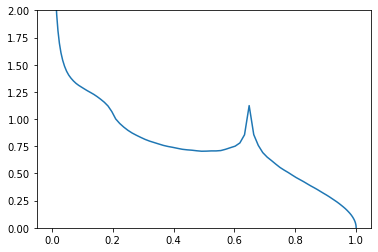

In [11]:
cl_total = cl_T + cl_ST
plt.plot(x,cl_total)
plt.ylim(0,2)
# representa el coeficiente de presiones

## 3. Coeficiente de Charnela
### 3.1 Coeficieente de Charnela para el perfil sin timón
![alt text](fotos/charST.png "Cl para el perfil")

In [12]:

def coefcharnela(theta, theta_a, alpha, A):
    # todos los ángulos tiene que ser puesto en radianes
    sum = 0
    # get sum
    for index, value in enumerate(A):
        if index == 0:
            sum += (alpha + A[index]) * tan(0.5 * theta)
        else:
            sum += A[index] * sin(index * theta)
    # note that multiplication with 4 and multiplication with 1/4
    # result in one as prefactor
    return -sum * (cos(theta) - cos(theta_a))*sin(theta)



In [13]:
theta_a = arccos(2*(xa-0.5)) # limite para la integral
alpha_char = np.array([-2,0,6]) # angulos de ataque

C_CHAR_CT = np.array([])
C_CHAR_ST = np.array([])

for count,i in enumerate(alpha_char):
    
    c_CHAR_CT = integrate.quad(coefcharnela, 0, theta_a, args=(theta_a , np.radians(i), CoefAN_ST + CoefAN_CT))[0]
    c_CHAR_ST = integrate.quad(coefcharnela, 0, theta_a, args=(theta_a , np.radians(i), CoefAN_ST))[0]
    C_CHAR_CT = np.append(C_CHAR_CT ,c_CHAR_CT )
    C_CHAR_ST = np.append(C_CHAR_ST ,c_CHAR_ST )

coef_charnela = pd.DataFrame({"alpha":alpha_char,"M_CH_ST":C_CHAR_ST,"M_CH_CT":C_CHAR_CT})    
guardarcsv(coef_charnela,"coeficientes_charnela")

In [14]:
coef_charnela

,alpha,M_CH_ST,M_CH_CT
0,-2,-0.003258,-0.013851
1,0,-0.006195,-0.016788
2,6,-0.015007,-0.025600


## 4.B0: cálculo de los coeficientes de Glauert aplicados al espesor
![alt text](fotos/apdo4.png "Cl para el perfil")

![](fotos/b0.png  "Cl para el perfil")


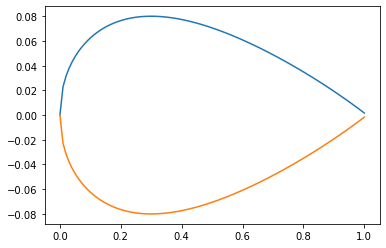

In [15]:
def f_espesor(x,t):
    a = 0.2969
    b = -0.126
    c = -0.3516
    d = 0.2843
    e = -0.1015
    f = 5*t*(a*x**0.5+b*x+c*x**2+d*x**3+e*x**4)
    return f
e = np.linspace(0,1,100)
f = f_espesor(e,t)
plt.plot(e,f)
plt.plot(e,-f)

## 4.1 Cáculo de B0

In [16]:
# definimos B0
numero_coefb0 = 200
nb0 = np.linspace(0,numero_coefb0,numero_coefb0+1) # este valor marca el número de B_n que va a haber


def coefb0_0(theta, n, t):
    # calcula el primer cacho del coeficiente B0(integral del numerador)
    a = 0.2969
    b = -0.126
    c = -0.3516
    d = 0.2843
    e = -0.1015
    cv = 0.5+0.5*cos(theta)
    sum = 0
    # get sum
    for index, value in enumerate(n):
        if index == 0:
            continue
        else:
            sum += (5*t*( a/(2*(cv**0.5)) + b + 2*c*cv + 3*d*cv**2 + 4*e*cv**3)) * sin(index * theta) * cos(index*pi)
    return sum

def coefb0_1(theta,n):
    # calcula el segundo cacho del coeficiente B0(integral del denominador)
    sum2 = 0
    for index, value in enumerate(n):
        if index == 0:
            continue
        else:
            sum2 += tan(theta*0.5)*sin(index*theta)*cos(index*pi)
    return sum2
    

In [17]:
Coefb0= (0.5 + (2/pi)*(integrate.quad(coefb0_0, 0, pi, args=(nb0,t))[0]) ) / ( (2/pi) * (integrate.quad(coefb0_1, 0, pi, args=(nb0))[0]) - 1 )

![alt text](fotos/b0.png "Cl para el perfil")

## 4.2 Cálculo de Bn

In [18]:
def coefBN(theta,n,b0):
    # calcula el coeficiente BN
    a = 0.2969
    b = -0.126
    c = -0.3516
    d = 0.2843
    e = -0.1015
    t = 0.12
    cv = 0.5+0.5*cos(theta)
    d_esp = (5*t*( a/(2*(cv**0.5)) + b + 2*c*cv + 3*d*cv**2 + 4*e*cv**3))
    return (d_esp - b0*tan(theta*0.5))*sin(theta*n)

CoefBN = np.array([])

for index, value in enumerate(nb0):
    if index == 0:
        continue
    else:
        coef1 = 2/pi * integrate.quad(coefBN , 0 , pi, args = (int(index),Coefb0))[0]
        CoefBN = np.append(CoefBN,coef1)
CoefBN = np.append(Coefb0,CoefBN)


In [114]:
COEFCIENTES_BN = pd.DataFrame({"B":nb0,"Valores":CoefBN})
guardarcsv(COEFCIENTES_BN,"coeficientes_bn")

In [111]:
COEFCIENTES_BN

,B,Valores
0,0.0,0.116012
1,1.0,-0.230420
2,2.0,0.025887
3,3.0,-0.093959
4,4.0,0.038793
...,...,...
196,196.0,0.053674
197,197.0,-0.054582
198,198.0,0.053676
199,199.0,-0.054575


## 4.3 Coeficente de presiones para el espesor

![alt text](fotos/cp.png "Cl para el perfil")

In [86]:

theta_bn = np.linspace(0,pi-0.001,100)
xbn = 0.5+cos(theta_bn)*0.5

def sumatorioBN(n,BN,x):
    # segundo miembro del cp para el espesor
    #theta = arccos(2*(x-0.5))
    Sumatorio = np.array([])
    for count,i in enumerate(x):
        sumatorio = 0
        for count2,j in enumerate(n):
            if count2 == 0:
                continue
            else :
                sumatorio -= BN[count2]*cos(int(count2)*i)
        Sumatorio = np.append(Sumatorio,sumatorio)
    return Sumatorio

cp_bn = -2*(CoefBN [0]-sumatorioBN(nb0,CoefBN,theta_bn))

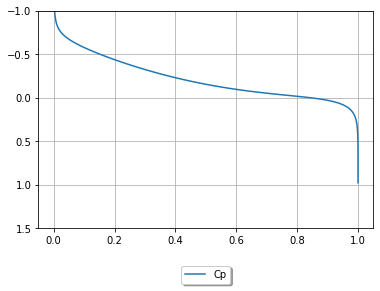

In [87]:
plt.plot(xbn ,cp_bn,label = "Cp")
plt.ylim((1.5,-1))
plt.grid(True)
leyendagrafica()

## 4.4 Cálculo del Cp_Extrado y el Cp_intrados

In [95]:
cpe = cp_ST + cp_bn
cpi = -cp_ST + cp_bn

In [89]:
CP_ESPESOR = pd.DataFrame({"Eje X":xbn,"Eje Theta":theta_bn,"CP":cp_bn,"Cp_extrados":cpe,"Cp_intrados":cpi})
guardarcsv(CP_ESPESOR,"cp_espesor")

In [77]:
CP_ESPESOR

,Eje X,Eje Theta,CP,Cp_extrados,Cp_intrados
0,1.000000e+00,0.000000,0.976955,0.976955,0.976955
1,9.997484e-01,0.031723,0.541379,0.538192,0.544566
2,9.989940e-01,0.063446,0.420359,0.413983,0.426735
3,9.977374e-01,0.095169,0.348445,0.338883,0.358008
4,9.959800e-01,0.126893,0.297287,0.284546,0.310028
...,...,...,...,...,...
95,4.083561e-03,3.013700,-0.953257,-1.026096,-0.880417
96,2.310360e-03,3.045423,-1.037369,-1.092162,-0.982577
97,1.037973e-03,3.077146,-1.186271,-1.222886,-1.149657
98,2.676774e-04,3.108869,-1.571968,-1.590308,-1.553628


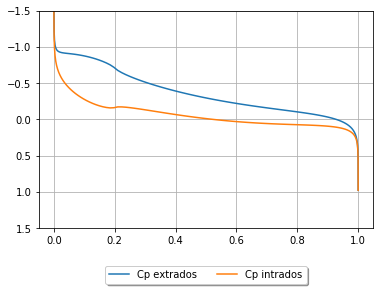

In [96]:
plt.plot(xbn,cpe, label = "Cp extrados")
plt.plot(xbn,cpi,label = "Cp intrados")
plt.ylim((1.5,-1.5))
plt.grid(True)
leyendagrafica()